Current directory: /workspace
passing here


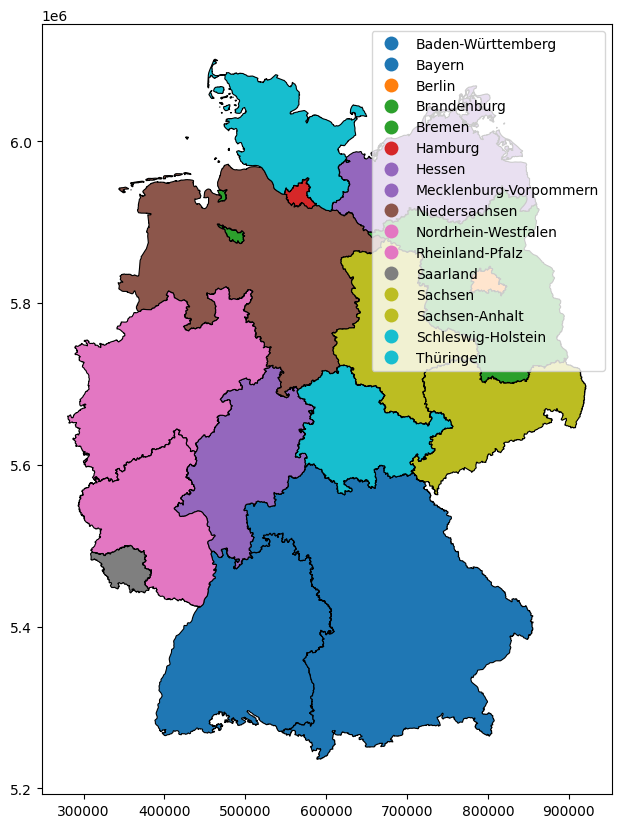

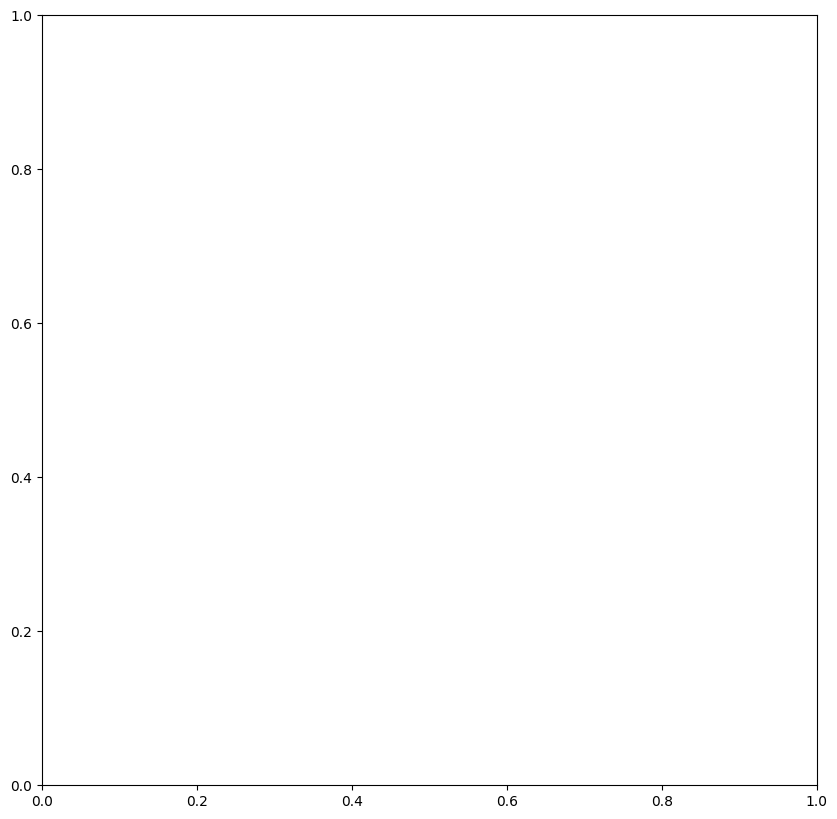

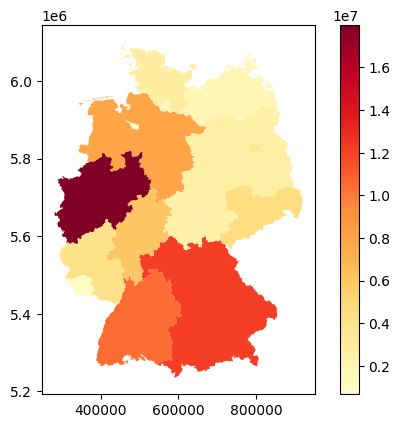

In [1]:
import sys
import os
from data_visualization import data_vis

In [4]:
SHAPEFILE_PATH = 'data/shapefile_states_ger/NUTS250_N1.shp'
POPULATION_DATA_PATH = 'data/raw/population_raw.csv'
OUTPUT_PATH = 'data_visualization/output/'

In [5]:
map_ger_gdf = data_vis.load_shapefile(SHAPEFILE_PATH)
population_df = data_vis.load_population_csv(POPULATION_DATA_PATH)
population_map_gdf = data_vis.merge_map_population(map_ger_gdf, population_df)

passing here


In [6]:
population_map_gdf = data_vis.merge_map_population(map_ger_gdf, population_df)

passing here


In [75]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.colors import TwoSlopeNorm
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [23]:
population_map_gdf.columns

Index([ 'geometry', 'NUTS_NAME',        1990,        1991,        1992,
              1993,        1994,        1995,        1996,        1997,
              1998,        1999,        2000,        2001,        2002,
              2003,        2004,        2005,        2006,        2007,
              2008,        2009,        2010,        2011,        2012,
              2013,        2014,        2015,        2016,        2017,
              2018,        2019,        2020,        2021,        2022,
              2023,        2024],
      dtype='object')

In [24]:
base_year = 1990

In [44]:
# Get all year columns
year_columns = sorted([col for col in population_map_gdf.columns if isinstance(col, int)])

for year in year_columns:
    population_map_gdf[f"rel_{year}"] = (
        (population_map_gdf[year] - population_map_gdf[base_year]) / population_map_gdf[base_year] * 100
    )
'''    
# Calculate global min/max for consistent color scale
vmin = population_map_gdf[year_columns].min().min()
vmax = population_map_gdf[year_columns].max().max()
bounds = population_map_gdf.total_bounds  # [minx, miny, maxx, maxy]'''

'    \n# Calculate global min/max for consistent color scale\nvmin = population_map_gdf[year_columns].min().min()\nvmax = population_map_gdf[year_columns].max().max()\nbounds = population_map_gdf.total_bounds  # [minx, miny, maxx, maxy]'

In [45]:
rel_cols = [f"rel_{y}" for y in year_columns]

vmin = population_map_gdf[rel_cols].min().min()
vmax = population_map_gdf[rel_cols].max().max()

# make it symmetric around zero (strongly recommended)
lim = max(abs(vmin), abs(vmax))
vmin, vmax = -lim, lim

In [ ]:
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

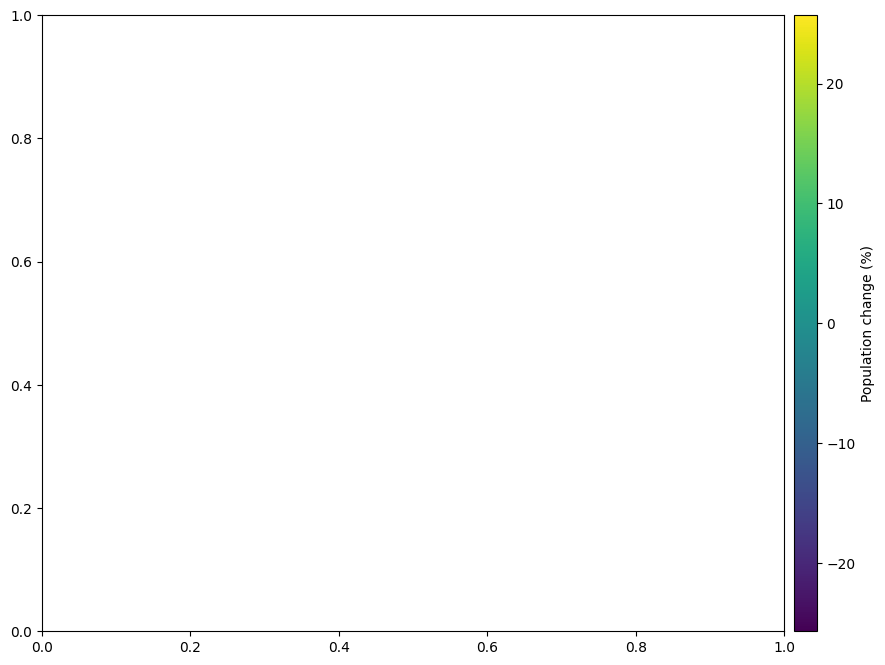

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.get_cmap("viridis")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # required
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("Population change (%)")

In [78]:
def update(frame):
    ax.clear()
    year = year_columns[frame]
    
    population_map_gdf.plot(
        column=f"rel_{year}",
        cmap=cmap,
        ax=ax,
        edgecolor='black',
        linewidth=0.5,
        norm=norm,
        legend=False,
        legend_kwds={
            'label': "Population",
            'shrink': 0.6,
            'orientation': 'vertical'
        }
    )
    
    ax.set_title(f'Population by Bundesland - {year}', 
                 fontsize=18, 
                 fontweight='bold',
                 pad=20)
    ax.axis('off')

    plt.tight_layout()
    
    # Add total population text
    total_pop = population_map_gdf[year].sum()
    ax.text(0.02, 0.02, f'Total: {total_pop:,.0f}',
            transform=ax.transAxes,
            fontsize=12,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

In [ ]:
anim = animation.FuncAnimation(
    fig, 
    update, 
    frames=len(year_columns),
    interval=150,  # milliseconds between frames
    repeat=True,
    blit=False
)

plt.close()

In [65]:
# Saving animation

print("Saving animation... this may take a few seconds")
anim.save(OUTPUT_PATH + 'percentage_population_evolution.gif', 
         writer='pillow', 
         fps=2,
         dpi=100)
print("Animation saved at '" + OUTPUT_PATH + "percentage_population_evolution.gif'")
plt.close()

Saving animation... this may take a few seconds
Animation saved at 'data_visualization/output/percentage_population_evolution.gif'


In [80]:
HTML(anim.to_jshtml())

<Figure size 640x480 with 0 Axes>